In [32]:
#import urllib.request

In [33]:
#website = "http://www.nativeplant.com/plants/search/input"

In [7]:
#page = urllib.request.urlopen(website)

In [8]:
#from bs4 import BeautifulSoup

In [9]:
#soup = BeautifulSoup(page)

In [318]:
#print (soup.prettify())

In [12]:
#soup.title

<title>Michigan Native Plants Database Search</title>

In [13]:
#soup.title.string

'Michigan Native Plants Database Search'

In [16]:
#soup.a

In [319]:
#all_tables=soup.find_all('table')

In [320]:
#all_tables

In [321]:
#import requests
#import pandas as pd
#from html.parser import HTMLParser

#url = 'http://www.nativeplant.com/plants/search/input'
#df_list = pd.read_html(url)
#print(df_list)
#df.to_csv('my data.csv')

In [322]:
#pd.read_html(requests.get(<url>).content)[-1].to_csv(<csv file>)

In [2]:
#import requests
#import lxml.html as lh
import pandas as pd

In [324]:
#url='http://www.nativeplant.com/plants/search/input'
#Create a handle, page, to handle the contents of the website
#page = requests.get(url)
#Store the contents of the website under doc
#doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
#tr_elements = doc.xpath('//tr')

In [325]:
#[len(T) for T in tr_elements[:12]]

In [326]:
#tr_elements

In [327]:
#doc

In [328]:
#page

In [3]:
data = pd.read_excel('plant_data.xlsx')

In [4]:
data.head()

,*,Link,Latin Name,Common Name,Light,Moisture,Height,Blooms,Price
0,*,NaN,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs: $3.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,*,NaN,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts: $7.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,*,NaN,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts: $8.00


In [5]:
data = data.drop(['*','Link'], axis = 1) 

In [6]:
data.head()

,Latin Name,Common Name,Light,Moisture,Height,Blooms,Price
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs: $3.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts: $7.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts: $8.00


In [7]:
data.dropna(axis = 0, how = 'all', inplace = True)
#data[data['Price'].notna()]

In [8]:
data

,Latin Name,Common Name,Light,Moisture,Height,Blooms,Price
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs: $3.00
2,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts: $7.00
4,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts: $8.00
6,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,4 -6 ft.,summer,NaN
7,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,2 -4 ft.,summer,quarts: $7.00
...,...,...,...,...,...,...,...
292,NaN,NaN,NaN,NaN,NaN,NaN,quarts: $7.00
293,Veronicastrum virginicum,Culver's root,sun -light shade,wet mesic -dry mesic,3 -5 ft.,early summer,quarts: $7.00
295,Viburnum lentago,Nannyberry; sheepberry,part sun,wet -wet mesic,8 -18 ft.,spring,1-gal: $18.00
297,Zizia aurea,Golden alexanders,sun -light shade,mesic -wet mesic,2 -4 ft.,spring,plugs: $3.00


In [9]:
#data.reset_index(drop=True)

In [10]:
price_data = data['Price'].str.split(":",n=1,expand=True)

In [11]:
data['Price_type'] = price_data[0]
data['Price_value'] = price_data[1]

In [12]:
#data.Price_value.value_counts()

In [13]:
data = data.drop(['Price'], axis = 1) 

In [14]:
data.head()

,Latin Name,Common Name,Light,Moisture,Height,Blooms,Price_type,Price_value
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs,$3.00
2,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts,$7.00
4,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts,$8.00
6,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,4 -6 ft.,summer,NaN,NaN
7,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,2 -4 ft.,summer,quarts,$7.00


In [15]:
data['Price_value'] = data['Price_value'].str.replace('$', '')

In [16]:
data.head()

,Latin Name,Common Name,Light,Moisture,Height,Blooms,Price_type,Price_value
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs,3.00
2,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts,7.00
4,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts,8.00
6,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,4 -6 ft.,summer,NaN,NaN
7,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,2 -4 ft.,summer,quarts,7.00


In [17]:
data = data.fillna(method='ffill')

In [18]:
data.head()

,Latin Name,Common Name,Light,Moisture,Height,Blooms,Price_type,Price_value
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs,3.00
2,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts,7.00
4,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts,8.00
6,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,4 -6 ft.,summer,quarts,8.00
7,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,2 -4 ft.,summer,quarts,7.00


In [19]:
data = data.reset_index(drop=True)

In [20]:
data.head()

,Latin Name,Common Name,Light,Moisture,Height,Blooms,Price_type,Price_value
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs,3.00
1,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts,7.00
2,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts,8.00
3,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,4 -6 ft.,summer,quarts,8.00
4,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,2 -4 ft.,summer,quarts,7.00


In [21]:
data.Height.unique()

array(['2 -3 ft.', '5 -5 ft.', '4 -6 ft.', '2 -4 ft.', '3 -4 ft.',
       '1 -1.5 ft.', '1 -2 ft.', '.5 -1 ft.', '2 -5 ft.', '.5 ft.',
       '3 -5 ft.', '4 -5 ft.', '2 -2.5 ft.', '1 -2.5 ft.', '2 ft.',
       '5 -8 ft.', 'vine', datetime.datetime(2020, 4, 3, 0, 0),
       '4 -8 ft.', '6 -10 ft.', '.5 -1.5 ft.', '3 -6 ft.', '3- 6 in.',
       '1 -3 ft.', '5 -10 ft.', '1.5 -2.5 ft.', '2-3 ft.', '6- 12 ft.',
       '6 -20 ft.', '5 -7 ft.', '2- 5 ft.', '3 -8 ft.', '1 ft.',
       '8 -20 ft.', '30- 50 ft.', '8 -18 ft.'], dtype=object)

In [22]:
height_data = data['Height'].str.split("-",n=1,expand=True)

In [23]:
data['Minimum_Height'] = height_data[0]
data['Maximum_Height'] = height_data[1]

In [24]:
data['Minimum_Height'].value_counts()

2         56
3         44
4         25
1         25
.5        12
5          6
2          5
1.5        4
6          4
2 ft.      3
.5 ft.     2
8          2
vine       2
6          1
3          1
30         1
1 ft.      1
Name: Minimum_Height, dtype: int64

In [25]:
#to treat such anamolies 
data['Minimum_Height'] = data['Minimum_Height'].str.replace(' ft.',' ')

In [26]:
data['Minimum_Height'].value_counts()

2       59
3       44
1       26
4       25
.5      14
5        6
2        5
6        4
1.5      4
vine     2
8        2
6        1
3        1
30       1
Name: Minimum_Height, dtype: int64

In [27]:
data = data.drop(['Height'], axis = 1) 

In [28]:
data['Maximum_Height'] = data['Maximum_Height'].str.replace(' ft.', '')
#data['Minimum_Height'] = data['Minimum_Height'].str.replace(' ft.',' ')

In [29]:
data['Maximum_Height'].value_counts()

3         43
4         33
5         31
6         23
2         14
1          9
8          8
1.5        7
2.5        6
10         4
20         2
7          1
 50        1
 6 in.     1
 12        1
 5         1
18         1
Name: Maximum_Height, dtype: int64

In [30]:
data.head()

,Latin Name,Common Name,Light,Moisture,Blooms,Price_type,Price_value,Minimum_Height,Maximum_Height
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,early summer,plugs,3.00,2,3
1,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,summer,quarts,7.00,5,5
2,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,spring,quarts,8.00,2,3
3,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,summer,quarts,8.00,4,6
4,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,summer,quarts,7.00,2,4


In [31]:
data.Moisture.unique()

array(['dry mesic', 'wet -wet mesic', 'mesic', 'mesic -wet mesic',
       'dry mesic -mesic', 'mesic -dry mesic', 'mesic - dry mesic',
       'wet -mesic', 'dry -dry mesic', 'wet - mesic', 'mesic (medium)',
       'wet mesic -mesic', 'wet mesic', 'wet mesic -wet',
       'medium -wet mesic', 'dry mesic -dry', 'mesic- dry mesic',
       'medium -dry', 'mesic -wet', 'dry mesic -wet mesic', 'mesic -dry',
       'medium to dry', 'wet mesic- wet', 'wet mesic -dry mesic',
       'medium to wet'], dtype=object)

In [32]:
data.Light.unique()

array(['sun -light shade', 'full sun -part shade', 'shade',
       'pt. shade -shade', 'full sun', 'sun -shade',
       'full sun -light shade', 'sun -pt.shade', 'pt. shade -sun',
       'shade -pt. sun', 'shade -part sun', 'sun', 'light shade',
       'shade -pt.sun', 'light shade -pt. sun', 'part sun -shade',
       'shade -light shade', 'part sun -light shade', 'sun -part shade',
       'sun -pt. shade', 'sun -pt. sun', 'sun -part sun',
       'shade - pt. sun', 'pt. shade - sun', 'pt. sun', 'shade- part sun',
       'light shade -part sun', 'sun - shade', 'pt.sun -sun',
       'pt. sun -sun', 'light shade -sun', 'full sun -pt. shade',
       'full sun- part sun', 'shade - part sun', 'part sun'], dtype=object)

In [33]:
data.dtypes

Latin Name        object
Common Name       object
Light             object
Moisture          object
Blooms            object
Price_type        object
Price_value       object
Minimum_Height    object
Maximum_Height    object
dtype: object

In [34]:
data.isnull().sum()

Latin Name        0
Common Name       0
Light             0
Moisture          0
Blooms            0
Price_type        0
Price_value       0
Minimum_Height    1
Maximum_Height    9
dtype: int64

In [35]:
data.shape

(195, 9)

In [36]:
null_data = data[data.isnull().any(axis=1)]
null_data

,Latin Name,Common Name,Light,Moisture,Blooms,Price_type,Price_value,Minimum_Height,Maximum_Height
16,Asarum canadense,Wild-ginger,shade,mesic,spring,"3"" pots",5.00,.5,None
53,Carex tenera,Quill sedge,part sun -light shade,wet mesic,summer,quarts,7.00,2,None
59,Clematis virginiana,Virgin's bower,sun -light shade,medium -wet mesic,summer,plugs,3.00,vine,None
60,Clematis virginiana,Virgin's bower,sun -light shade,medium -wet mesic,summer,quarts,7.00,vine,None
61,Collinsonia canadensis,"Stoneroot, Richweed",shade -pt. sun,mesic,late summer,quarts,7.00,NaN,NaN
76,Fragaria virginiana,Wild strawberry,sun -part sun,mesic -dry mesic,spring,quarts,7.00,.5,None
158,Senecio pauperculus,Balsam ragwort,light shade -part sun,dry mesic,spring,plugs,3.00,2,None
159,(Packera paupercula),Balsam ragwort,light shade -part sun,dry mesic,spring,plugs,3.00,2,None
161,Sisyrinchium angustifolium,Stout blue-eyed-grass,sun -part sun,mesic,spring,quarts,7.00,1,None


In [37]:
data['Maximum_Height'] = data['Maximum_Height'].fillna(0)
data['Minimum_Height'] = data['Minimum_Height'].fillna(0)

In [38]:
data.isnull().sum()

Latin Name        0
Common Name       0
Light             0
Moisture          0
Blooms            0
Price_type        0
Price_value       0
Minimum_Height    0
Maximum_Height    0
dtype: int64

In [39]:
data

,Latin Name,Common Name,Light,Moisture,Blooms,Price_type,Price_value,Minimum_Height,Maximum_Height
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,early summer,plugs,3.00,2,3
1,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,summer,quarts,7.00,5,5
2,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,spring,quarts,8.00,2,3
3,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,summer,quarts,8.00,4,6
4,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,summer,quarts,7.00,2,4
...,...,...,...,...,...,...,...,...,...
190,Vernonia missurica,Missouri ironweed,sun,mesic -wet mesic,late summer,quarts,7.00,4,6
191,Veronicastrum virginicum,Culver's root,sun -light shade,wet mesic -dry mesic,early summer,quarts,7.00,3,5
192,Viburnum lentago,Nannyberry; sheepberry,part sun,wet -wet mesic,spring,1-gal,18.00,8,18
193,Zizia aurea,Golden alexanders,sun -light shade,mesic -wet mesic,spring,plugs,3.00,2,4


In [40]:
data = data.loc[data.Minimum_Height != 'vine']

In [41]:
data['Minimum_Height'].unique()

array(['2 ', '5 ', '4 ', '3 ', '1 ', '.5 ', 0, '6 ', '3', '1.5 ', '2',
       '6', '8 ', '30'], dtype=object)

In [42]:
 data['Minimum_Height'].astype(float)

#print(data['Minimum_Height'].min())
#print(data['Minimum_Height'].max())

0      2.0
1      5.0
2      2.0
3      4.0
4      2.0
      ... 
190    4.0
191    3.0
192    8.0
193    2.0
194    2.0
Name: Minimum_Height, Length: 193, dtype: float64

In [43]:
data['Minimum_Height'] = data['Minimum_Height'].astype(float)

C:\Users\Aishwariya Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
data['Minimum_Height'].max()

30.0

In [45]:
data['Maximum_Height'].value_counts()
#data['Maximum_Height'] = data['Maximum_Height'].astype(float)

3         43
4         33
5         31
6         23
2         14
1          9
8          8
1.5        7
0          7
2.5        6
10         4
20         2
 6 in.     1
 50        1
 12        1
 5         1
7          1
18         1
Name: Maximum_Height, dtype: int64

In [46]:
data = data.loc[data.Maximum_Height !=  ' 6 in.' ]

In [47]:
data['Maximum_Height'].unique()

array(['3', '5', '6', '4', '1.5', '2', '1', 0, '2.5', '8', '10', ' 12',
       '20', '7', ' 5', ' 50', '18'], dtype=object)

In [48]:
data['Maximum_Height'] = data['Maximum_Height'].astype(float)

In [49]:
data['Price_value'] = data['Price_value'].astype(float)

In [50]:
data.dtypes

Latin Name         object
Common Name        object
Light              object
Moisture           object
Blooms             object
Price_type         object
Price_value       float64
Minimum_Height    float64
Maximum_Height    float64
dtype: object

In [51]:
print("The range of height of a plant is from :", data['Minimum_Height'].min(),"feet to",data['Maximum_Height'].max(),"feet")

The range of height of a plant is from : 0.0 feet to 50.0 feet


In [52]:
#Shortest Plant in our dataframe

In [53]:
#data.loc[data['Maximum_Height'].min()]

In [54]:
#Top 3 shortest plants
data.nsmallest(3,['Maximum_Height'])

,Latin Name,Common Name,Light,Moisture,Blooms,Price_type,Price_value,Minimum_Height,Maximum_Height
16,Asarum canadense,Wild-ginger,shade,mesic,spring,"3"" pots",5.0,0.5,0.0
53,Carex tenera,Quill sedge,part sun -light shade,wet mesic,summer,quarts,7.0,2.0,0.0
61,Collinsonia canadensis,"Stoneroot, Richweed",shade -pt. sun,mesic,late summer,quarts,7.0,0.0,0.0


In [55]:
#Top 3 longest plants
data.nlargest(3,['Maximum_Height'])

,Latin Name,Common Name,Light,Moisture,Blooms,Price_type,Price_value,Minimum_Height,Maximum_Height
187,Thuja occidentalis,"White Cedar, Arbor vitae",shade- part sun,medium to wet,spring,quarts,7.0,30.0,50.0
137,Prunus virginiana,Choke cherry,shade -part sun,mesic -dry,spring,1-gal,18.0,6.0,20.0
182,Staphylea trifolia,Bladdernut,shade -part sun,mesic -wet mesic,early spring,1-gal,18.0,8.0,20.0


In [56]:
#Top 3 non expensive plants
data.nsmallest(3,['Price_value'])

,Latin Name,Common Name,Light,Moisture,Blooms,Price_type,Price_value,Minimum_Height,Maximum_Height
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,early summer,plugs,3.0,2.0,3.0
7,Andropogon gerardii,Big bluestem grass,full sun,mesic -dry mesic,summer,plugs,3.0,4.0,6.0
10,Anemone virginiana,Thimbleweed,sun -shade,mesic,summer,plugs,3.0,2.0,4.0


In [57]:
#Top 3 expensive plants
data.nlargest(3,['Price_value'])

,Latin Name,Common Name,Light,Moisture,Blooms,Price_type,Price_value,Minimum_Height,Maximum_Height
57,Cephalanthus occidentalis,Buttonbush,sun -part shade,wet mesic -wet,summer,1-gal,18.0,5.0,8.0
71,Euonymus obovata,Creeping Strawberry-bush,shade -light shade,mesic (medium),spring,1-gal,18.0,0.5,1.5
94,Hypericum prolificum,Shrubby st.john's-wort,sun -part shade,medium -dry,summer,1-gal,18.0,5.0,10.0


In [58]:
data.Price_value.quantile([0.25,0.5,0.75,0.9,0.99])

0.25     3.0
0.50     7.0
0.75     7.0
0.90     7.9
0.99    18.0
Name: Price_value, dtype: float64

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.distplot(data['Price_value']).set_title('Distribution of Price')

Text(0.5, 1.0, 'Distribution of Price')

In [60]:
data['Price_value'].mean()

6.411458333333333

In [61]:
#average_price = 6.40
below_avg = data[data['Price_value'] <= data['Price_value'].mean()]
below_avg

,Latin Name,Common Name,Light,Moisture,Blooms,Price_type,Price_value,Minimum_Height,Maximum_Height
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,early summer,plugs,3.0,2.0,3.0
7,Andropogon gerardii,Big bluestem grass,full sun,mesic -dry mesic,summer,plugs,3.0,4.0,6.0
10,Anemone virginiana,Thimbleweed,sun -shade,mesic,summer,plugs,3.0,2.0,4.0
16,Asarum canadense,Wild-ginger,shade,mesic,spring,"3"" pots",5.0,0.5,0.0
21,Aster cordifolius,Heart-leaved Aster,light shade,mesic -dry mesic,late fall,plugs,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...
179,Sorghastrum nutans,Indian grass,sun,mesic -dry mesic,summer,plugs,3.0,4.0,6.0
183,Thalictrum dasycarpum,Tall meadow-rue,shade -part sun,mesic -wet mesic,late spring- early summer,plugs,3.0,3.0,6.0
185,Thalictrum dioicum,Early meadow-rue,shade - part sun,mesic,spring,plugs,3.0,2.0,3.0
189,Vernonia missurica,Missouri ironweed,sun,mesic -wet mesic,late summer,plugs,3.0,4.0,6.0


In [62]:
above_avg = data[data['Price_value'] >= data['Price_value'].mean()]
above_avg

,Latin Name,Common Name,Light,Moisture,Blooms,Price_type,Price_value,Minimum_Height,Maximum_Height
1,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,summer,quarts,7.0,5.0,5.0
2,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,spring,quarts,8.0,2.0,3.0
3,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,summer,quarts,8.0,4.0,6.0
4,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,summer,quarts,7.0,2.0,4.0
5,Agrimonia parviflora,Swamp Agrimony,sun -light shade,mesic -wet mesic,summer,quarts,7.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...
188,Tradescantia ohiensis,Common spiderwort,sun -light shade,wet mesic -dry mesic,late spring through summer,quarts,7.0,1.5,2.5
190,Vernonia missurica,Missouri ironweed,sun,mesic -wet mesic,late summer,quarts,7.0,4.0,6.0
191,Veronicastrum virginicum,Culver's root,sun -light shade,wet mesic -dry mesic,early summer,quarts,7.0,3.0,5.0
192,Viburnum lentago,Nannyberry; sheepberry,part sun,wet -wet mesic,spring,1-gal,18.0,8.0,18.0


In [63]:
len(above_avg)

123

In [64]:
print("Number of plants below the average price value are:", len(below_avg), "and Number of plants above the average price value are:", len(above_avg))

Number of plants below the average price value are: 69 and Number of plants above the average price value are: 123


In [65]:
data.Light.value_counts()

sun -light shade         32
sun                      30
shade -part sun          21
sun -part sun            15
sun -part shade          11
full sun                  9
shade                     7
shade -light shade        7
pt. sun -sun              5
part sun -light shade     5
light shade -part sun     4
pt. shade - sun           4
sun -shade                4
full sun -light shade     3
pt.sun -sun               3
light shade               3
shade -pt. sun            2
pt. shade -shade          2
sun -pt. shade            2
shade - part sun          2
sun -pt. sun              2
shade -pt.sun             2
sun - shade               2
shade- part sun           2
light shade -pt. sun      2
shade - pt. sun           2
part sun                  1
pt. shade -sun            1
part sun -shade           1
pt. sun                   1
sun -pt.shade             1
light shade -sun          1
full sun -pt. shade       1
full sun -part shade      1
full sun- part sun        1
Name: Light, dtype: 

In [66]:
data['Blooms'].value_counts()

summer                        54
spring                        48
late summer                   32
fall                          30
late spring                    6
early summer                   4
late spring- early summer      4
late fall                      3
late summer - fall             3
early fall                     2
early spring                   2
late Summer- fall              2
late spring through summer     1
late spring- summer            1
Name: Blooms, dtype: int64

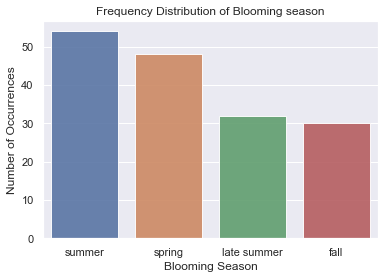

In [75]:
#choosing top 4 kinds of blooms for further analysis 
import matplotlib.pyplot as plt
blooms_count = data['Blooms'].value_counts()[:4]
sns.set(style="darkgrid")
sns.barplot(blooms_count.index, blooms_count.values, alpha=0.9)
plt.title('Frequency Distribution of Blooming season')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Blooming Season', fontsize=12)
plt.show()

In [77]:
data.groupby('Blooms').apply(lambda data: data.Price_value.iloc[0])

Blooms
early fall                    3.0
early spring                  7.0
early summer                  3.0
fall                          7.0
late Summer- fall             3.0
late fall                     3.0
late spring                   7.0
late spring through summer    7.0
late spring- early summer     3.0
late spring- summer           7.0
late summer                   7.0
late summer - fall            3.0
spring                        8.0
summer                        7.0
dtype: float64

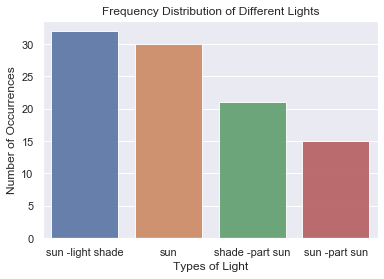

In [81]:
light_count = data['Light'].value_counts()[:4]
sns.set(style="darkgrid")
sns.barplot(light_count.index, light_count.values, alpha=0.9)
plt.title('Frequency Distribution of Different Lights')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types of Light', fontsize=12)
plt.show()

In [84]:
#blooming in summer plants
SummerPlants = data[data['Blooms'] == "summer"].sort_values(by='Price_value')

In [85]:
SummerPlants

,Latin Name,Common Name,Light,Moisture,Blooms,Price_type,Price_value,Minimum_Height,Maximum_Height
102,Juncus tenuis,Roadside rush; path rush,sun -light shade,dry mesic -wet mesic,summer,plugs,3.0,1.0,2.0
97,(Elymus hystrix),Bottlebrush grass,sun -shade,mesic -dry mesic,summer,plugs,3.0,2.0,5.0
96,Hystrix patula,Bottlebrush grass,sun -shade,mesic -dry mesic,summer,plugs,3.0,2.0,5.0
118,Mimulus ringens,Monkey-flower,sun -part sun,mesic -wet mesic,summer,plugs,3.0,2.0,4.0
85,Helianthus pauciflorus,Prairie sunflower,full sun,dry mesic,summer,plugs,3.0,3.0,4.0
120,Monarda fistulosa,"Wild bergamot, Beebalm",pt. sun -sun,mesic,summer,plugs,3.0,3.0,5.0
47,Carex muskingumensis,Muskingum sedge,shade -part sun,mesic -wet mesic,summer,plugs,3.0,1.0,2.0
42,Brachyelytrum erectum,Long-awned Wood Grass,shade,mesic,summer,plugs,3.0,1.0,2.0
41,Boehmeria cylindrica,False Nettle,pt. shade -shade,wet -wet mesic,summer,plugs,3.0,2.0,3.0
115,Mentha arvensis,Wild mint,pt.sun -sun,wet -mesic,summer,plugs,3.0,2.0,3.0
